In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
# subject 0, night 0
file = "sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# metadata
info = data.info
channels = data.ch_names
print("Metadata: \n ", data)
print(info)
print("Channels: ", channels)
#print("raw_data size: ", raw_data.shape)
# extract each channel
EEG_Cz = raw_data[0] * 1000000
EEG_Oz = raw_data[1] * 1000000
EOG = raw_data[2] * 1000000
Resp = raw_data[3]
EMG = raw_data[4]
Temp = raw_data[5]
Event = raw_data[6]
sf = 100.
time = np.arange(EEG_Cz.size) / sf

Extracting EDF parameters from c:\Users\flake\Documents\Homework\CSCI5622\Project Work\sleep-edf-database-expanded-1.0.0\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Metadata: 
  <RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
Channels:  ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [ ]:
def moving_average_smoothing(X,k):
	S = np.zeros(X.shape[0])
	for t in range(X.shape[0]):
		if t < k:
			S[t] = np.mean(X[:t+1])
		else:
			S[t] = np.sum(X[t-k:t])/k
	return S

In [ ]:
def single_exponential_smoothing(X, a):
    # 0<a<1
    if(a<0 or a>1):
        print('a must be in [0,1]')
        return 0
    S = np.zeros(X.shape[0])
    S[0] = X[0]
    for t in range(1, X.shape[0]):
        S[t] = a*X[t]+(1-a)*S[t-1]
    return S

In [ ]:
def double_exponential_smoothing(X, a, b):
    if(a<=0 or a>=1):
        print('a must be in (0,1)')
        return 0
    if(b<=0 or b>=1):
        print('b must be in (0,1)')
        return 0
    S = np.zeros(X.shape[0])
    B = np.zeros(X.shape[0])
    S[0] = X[0]
    B[0] = X[1]-X[0]
    for t in range(1, X.shape[0]):
        S[t] = a*X[t] + (1-a)*(S[t-1]+B[t-1])
        B[t] = b*(S[t]-S[t-1])+B[t-1]*(1-b)
    return S

In [ ]:
n = 100
X = np.zeros(shape=(n,1))
for i in range(n):
    X[i,0]=time[i]
Y = np.zeros(shape=(n,1))
for i in range(n):
    Y[i]=EEG_Oz[i]

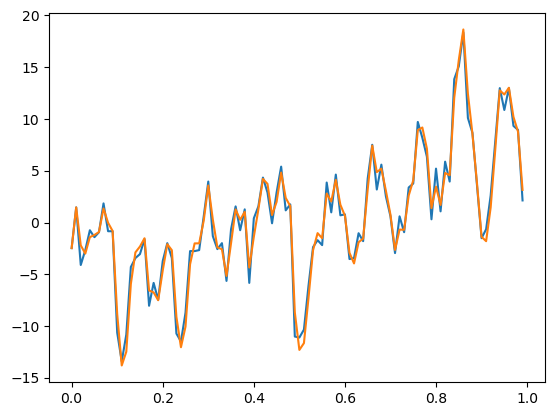

In [ ]:
smooth_Y = moving_average_smoothing(Y,20)
smooth_Y2 = single_exponential_smoothing(Y,0.1)
smooth_Y3 = double_exponential_smoothing(Y,0.8, 0.8)
plt.plot(X,Y)
#plt.plot(X,smooth_Y)
plt.plot(X,smooth_Y3)